### PART A --- Data Cleaning

In [234]:
import os                 # Operation system related commands

## Data manipulation
import os #----to save files on operating system
import numpy as np
import pandas as pd
import datetime as dt
import pandas_profiling  #conda install -c anaconda pandas-profiling
import re as re

## Visualization
import scipy.stats as stats
import matplotlib.pyplot as plt
%pylab inline  
import seaborn as sns
# To show visulization output in Jupyter notebooks

# Before model building
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocess
import sklearn.feature_selection as feature_selection

#Model Building
import statsmodels as st
import statsmodels.formula.api as smp
from sklearn.linear_model import LinearRegression
#Selectively import to ensure that the hige package does not load your system


Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [235]:
%pwd
house=pd.read_csv("C:/Users/rujut/Pictures/Python/Assignment/Answers_rujuta0101@gmail.com__PythonAdvanced/rujuta0101@gmail.com_Casestudy2_House_LinearRegression/2. Predicting House Prices/House_Prices.csv")
house.head(10)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
5,6,114600,1780,3,2,2,No,North
6,7,151600,1830,3,3,3,Yes,West
7,8,150700,2160,4,2,2,No,West
8,9,119200,2110,4,2,3,No,East
9,10,104000,1730,3,3,3,No,East


In [236]:
house.info()
#No missing variable issue
#No issue with column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
Home            128 non-null int64
Price           128 non-null int64
SqFt            128 non-null int64
Bedrooms        128 non-null int64
Bathrooms       128 non-null int64
Offers          128 non-null int64
Brick           128 non-null object
Neighborhood    128 non-null object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [237]:
profile_report=pandas_profiling.ProfileReport(house)
profile_report.to_file('house_profile_report.html')
profile_report
#NOt available in anaconda package
# Anaconda prompt:: conda install -c anaconda pandas-profiling

#House- Is unique identifier and needs to be dropped
#Price - Is output Y varaible; It followed Normal Distribution; Its trasnformation (log,sqrt,sqr,inv) do not give better curve
#         Extrem value capping required ; No missing ; Numeric
#SqFT -  It followed Normal Distribution; Its trasnformation (log,sqrt,sqr,inv) do not give better curve
#         Extrem value capping required ; No missing; Numeric
#Bedrooms - Needs to be converted into ordinal dummies Variable ; Numeric-Dummpy; No missing 
#Bathrooms - Needs to be converted into ordinal dummies Variable ; Numeric-Dummpy; No missing 
#Offers-    Needs to be converted into ordinal dummies Variable ; Numeric-Dummpy; No missing 
#Brike--    Needs to be converted into cardinal dummies Variable ; Numeric-Dummpy; No missing   
#Neighborhood--Needs to be converted into cardinal dummies Variable ; Numeric-Dummpy; No missing   


C:\ProgramData\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,8
Number of observations,128
Total Missing (%),0.0%
Total size in memory,8.1 KiB
Average record size in memory,65.0 B
Numeric,6
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [238]:
def outlier_capping(x):
  #  x=pd.DataFrame(x)
    x1=x.quantile(0.99)
    x2=x.quantile(0.01)
    x.clip(lower=x2,upper=x1)
   # x=x.clip(upper=x.quantile(0.99),axis=0, inplace=True)
   # x=x.clip(lower=x.quantile(0.01), axis=0, inplace=True) 
    return(x)

house['SqFt'].quantile(0.01)
#house['SqFt']=house['SqFt'].apply(lambda x: outlier_capping(x))  # The lambda function gets appplied on ever variable 
#upper_Sqft=abs(round(x.quantile(0.99)))
#lower_Sqft=abs(round(x.quantile(0.01)))
lower_Sqft=1664
upper_Sqft=2368
house['SqFt']=house['SqFt'].apply(lambda x: upper_Sqft if round(abs(x))>upper_Sqft else x)
house['SqFt']=house['SqFt'].apply(lambda x: lower_Sqft if x<lower_Sqft else x)

    

In [239]:
num_var_names=[key for key in dict(house.dtypes) if dict(house.dtypes)[key] in['float64','int64','float32','int32'] ]
cat_var_names=[key for key in dict(house.dtypes) if dict(house.dtypes)[key] in['object']]

print(num_var_names)
print(cat_var_names)

house_cat=house[cat_var_names]
house_num=house[num_var_names]


['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']
['Brick', 'Neighborhood']


In [240]:
# Getting dummies for categorical variables
house_cat=pd.get_dummies(house_cat,columns=['Brick', 'Neighborhood'], drop_first=True)
print(house_cat)
# Getting dummies for numeric variables
house_num=pd.get_dummies(house_num,columns=['Bedrooms', 'Bathrooms','Offers'], drop_first=True)
print(house_num)

     Brick_Yes  Neighborhood_North  Neighborhood_West
0            0                   0                  0
1            0                   0                  0
2            0                   0                  0
3            0                   0                  0
4            0                   0                  0
..         ...                 ...                ...
123          1                   0                  0
124          1                   0                  0
125          0                   1                  0
126          0                   0                  1
127          0                   1                  0

[128 rows x 3 columns]
     Home   Price  SqFt  Bedrooms_3  Bedrooms_4  Bedrooms_5  Bathrooms_3  \
0       1  114300  1790           0           0           0            0   
1       2  114200  2030           0           1           0            0   
2       3  114800  1740           1           0           0            0   
3       4   94700  1980 

In [241]:
house_final=pd.concat([house_num,house_cat], axis=1)
house_final.reset_index()
house_final.columns
house_final.drop(['Home'],axis=1,inplace=True)
house_final.head()

,Price,SqFt,Bedrooms_3,Bedrooms_4,Bedrooms_5,Bathrooms_3,Bathrooms_4,Offers_2,Offers_3,Offers_4,Offers_5,Offers_6,Brick_Yes,Neighborhood_North,Neighborhood_West
0,114300,1790,0,0,0,0,0,1,0,0,0,0,0,0,0
1,114200,2030,0,1,0,0,0,0,1,0,0,0,0,0,0
2,114800,1740,1,0,0,0,0,0,0,0,0,0,0,0,0
3,94700,1980,1,0,0,0,0,0,1,0,0,0,0,0,0
4,119800,2130,1,0,0,1,0,0,1,0,0,0,0,0,0


### Part B --- Modelling preperation

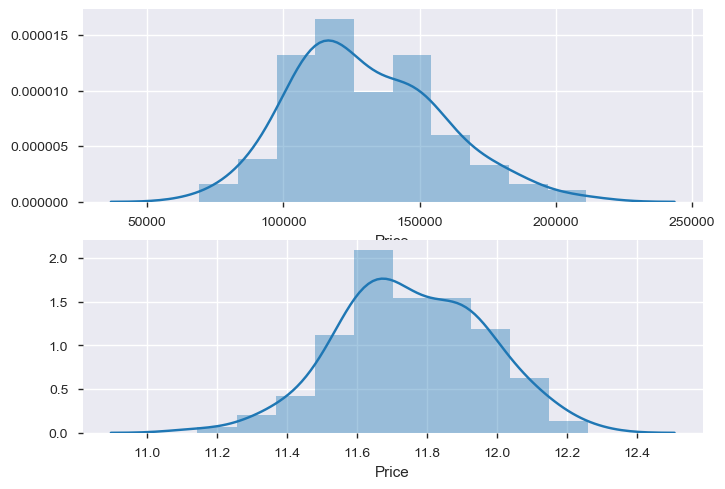

In [242]:
#B1  Y ie. Price follows Normal Distribution---Yes it does

# On transformation no significant change is observed

subplot(2,1,1)
sns.distplot(house_final["Price"])
ln_Price=np.log(house_final["Price"]) # Log transformation of varaiable

subplot(2,1,2)
sns.distplot(ln_Price)




In [243]:
#B2. All variable have Variation
# If coeffeicnt of varaince is less than 0.05 then drop it
house_cov_var=house_final.apply(lambda x: np.mean(x)/np.std(x))
house_cov_var.to_csv('house_cov_var.csv')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [244]:
#B3. Each of X and Y variables are coorelated
house_corr_mat=house_final.corr()
house_corr_mat.to_csv('house_corr_mat.csv')
house_corr_mat

,Price,SqFt,Bedrooms_3,Bedrooms_4,Bedrooms_5,Bathrooms_3,Bathrooms_4,Offers_2,Offers_3,Offers_4,Offers_5,Offers_6,Brick_Yes,Neighborhood_North,Neighborhood_West
Price,1.000000,0.552908,-0.183831,0.482070,0.184168,0.460239,0.229013,0.056884,-0.104493,-0.145915,-0.074636,-0.133044,0.452817,-0.548221,0.714007
SqFt,0.552908,1.000000,-0.043804,0.352770,0.188855,0.499620,0.135352,-0.122314,0.000772,0.305944,0.113867,0.023143,0.102660,-0.275426,0.234533
Bedrooms_3,-0.183831,-0.043804,1.000000,-0.567223,-0.132039,0.069862,-0.092997,-0.133727,0.127854,0.046403,0.147820,0.084669,-0.032794,0.064838,-0.183994
Bedrooms_4,0.482070,0.352770,-0.567223,1.000000,-0.068188,0.246528,-0.048026,-0.006486,0.061383,-0.015994,-0.083847,-0.048026,-0.020495,-0.313125,0.493225
Bedrooms_5,0.184168,0.188855,-0.132039,-0.068188,1.000000,0.017895,0.704317,-0.078811,-0.094363,0.124581,-0.019518,-0.011180,0.180283,-0.091184,0.053462
Bathrooms_3,0.460239,0.499620,0.069862,0.246528,0.017895,1.000000,-0.077023,-0.016454,0.073492,0.125885,0.074162,-0.077023,0.132872,-0.262707,0.248319
Bathrooms_4,0.229013,0.135352,-0.092997,-0.048026,0.704317,-0.077023,1.000000,-0.055508,-0.066461,-0.037048,-0.013747,-0.007874,0.126976,-0.064222,0.134048
Offers_2,0.056884,-0.122314,-0.133727,-0.006486,-0.078811,-0.016454,-0.055508,1.000000,-0.468521,-0.261169,-0.096909,-0.055508,-0.067076,-0.050304,0.038932
Offers_3,-0.104493,0.000772,0.127854,0.061383,-0.094363,0.073492,-0.066461,-0.468521,1.000000,-0.312706,-0.116032,-0.066461,0.066104,0.040709,-0.142053
Offers_4,-0.145915,0.305944,0.046403,-0.015994,0.124581,0.125885,-0.037048,-0.261169,-0.312706,1.000000,-0.064680,-0.037048,-0.151369,0.206747,-0.133153


In [245]:
# Varible reduction
features= house_final[house_final.columns.difference(['Price'])]
target=house_final['Price']


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import itertools


#lm=LinearRegression()  # Can use random forest etc other techniques
                        # LInear Regression will get affceted by multicollinearity
    # We could observe these as all the Manufactures name came up in this list
    
lm= RandomForestRegressor()

#Create RFE model and select 10 attributes
rfe = RFE(lm,n_features_to_select=10)
#rfe.fit(car_final[car_final.columns.difference(['ln_Sales_in_thousands'])], target)
rfe.fit(features, target)
features.columns[rfe.support_]

Index(['Bathrooms_3', 'Bedrooms_3', 'Bedrooms_4', 'Brick_Yes',
       'Neighborhood_North', 'Neighborhood_West', 'Offers_2', 'Offers_3',
       'Offers_4', 'SqFt'],
      dtype='object')

In [246]:

from sklearn.feature_selection import f_regression
f_values,p_values=f_regression(features,target)
import itertools # get output in one place
f_reg_results=[(i,v,z) for i,v,z in itertools.zip_longest(features.columns, f_values, ['%.3f' %p for p in p_values])]
f_reg_results=pd.DataFrame((f_reg_results),columns=['variable','f_values','p_values'])
f_reg_results.sort_values(by=['f_values'],ascending=False, inplace=True)
f_reg_results.to_csv('house_f_reg_results.csv')

In [253]:
#Variables not consideed:
final_list_var=['Price', 'SqFt', 'Bedrooms_3', 'Bedrooms_4', 'Bedrooms_5',
       'Bathrooms_3', 'Bathrooms_4', 'Offers_2', 'Offers_3', 'Offers_4',
       'Offers_5', 'Offers_6', 'Brick_Yes', 'Neighborhood_North',
       'Neighborhood_West']
      
final_list_var=[
    #'Price',
   'SqFt',
    'Bedrooms_3',
    #'Bedrooms_4',
    #'Bedrooms_5',
     #  'Bathrooms_3', 'Bathrooms_4', 'Offers_2',
    #'Offers_3',
   # 'Offers_4',
      # 'Offers_5', 'Offers_6',
    #'Brick_Yes',
   # 'Neighborhood_North',
       'Neighborhood_West']



final_list_var=[
 #'Price', 'SqFt', 
    'Bedrooms_3',
    'Bedrooms_4', 'Bedrooms_5',
       'Bathrooms_3', 'Bathrooms_4',
    'Offers_2',
    'Offers_3', 'Offers_4',
     'Offers_5',
   'Offers_6',
    'Brick_Yes', 'Neighborhood_North',
       'Neighborhood_West' ]

# SQFT only approach
# Rest all cause p value in output was very high
final_list_var=[
 #'Price', 'SqFt', 
    #'Bedrooms_3',
    'Bedrooms_4', #'Bedrooms_5',
       'Bathrooms_3',# 'Bathrooms_4',
  #  'Offers_2',
    'Offers_3', 'Offers_4',
    #   'Offers_5',
   # 'Offers_6',
    'Brick_Yes', #'Neighborhood_North',
       'Neighborhood_West' ]




final_list_var



['Bedrooms_4',
 'Bathrooms_3',
 'Offers_3',
 'Offers_4',
 'Brick_Yes',
 'Neighborhood_West']

In [254]:
#G5 VIF Variance Inflation Factor --- Before doing this find imp key variables from above step
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=features[final_list_var]
y=target

vif=pd.DataFrame()
vif["vif_factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["feature"]=x.columns
x=vif.round(1).sort_values(by=["vif_factor"],ascending=False)
x


,vif_factor,feature
1,2.0,Bathrooms_3
5,2.0,Neighborhood_West
0,1.8,Bedrooms_4
2,1.4,Offers_3
4,1.4,Brick_Yes
3,1.2,Offers_4


Part C-Modelling

In [255]:
lm_house_variables=final_list_var
final=pd.DataFrame(house_final[lm_house_variables])
final["Price"]=house_final["Price"]


In [256]:
train, test= train_test_split(final,test_size=0.3,random_state=101) # Test data will be 30% 
eqn="Price~"+"+".join(lm_house_variables)
print(eqn)

Price~Bedrooms_4+Bathrooms_3+Offers_3+Offers_4+Brick_Yes+Neighborhood_West


In [257]:
ols_model=smp.ols(formula=eqn,data=train)
ols_model_output=ols_model.fit()

print(ols_model_output.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     57.46
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           2.53e-27
Time:                        23:22:54   Log-Likelihood:                -963.16
No. Observations:                  89   AIC:                             1940.
Df Residuals:                      82   BIC:                             1958.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.097e+05   2397.81

In [258]:
train_predicted=ols_model_output.predict(train)
test_predicted=ols_model_output.predict(test)
train_actual=train.Price
test_actual=test.Price


In [259]:
#metrics

#RMSE Root Mean Square Error
train_RMSE= np.sqrt(np.mean(np.square(train_actual-train_predicted)))
test_RMSE= np.sqrt(np.mean(np.square(test_actual-test_predicted)))
print("********************   RMSE   *********************")
print(train_RMSE)
print(test_RMSE)


#MAPE Mean Absolute Percentage Error
train_MAPE= np.mean(np.abs((train_actual-train_predicted)/train_actual))
test_MAPE= np.mean(np.abs((test_actual-test_predicted)/test_actual))
print("********************   MAPE   *********************")
print(train_MAPE)
print(test_MAPE)



#Correlation cofficient
train_Corrcoef=np.corrcoef(train_actual, train_predicted)
test_Corrcoef=np.corrcoef(test_actual, test_predicted)
print("********************   COrrelation Coefficient   *********************")
print(train_Corrcoef)
print(test_Corrcoef)

********************   RMSE   *********************
12125.314404522429
17642.291561086593
********************   MAPE   *********************
0.07791080235461031
0.09896225968005606
********************   COrrelation Coefficient   *********************
[[1.         0.89881329]
 [0.89881329 1.        ]]
[[1.         0.74278364]
 [0.74278364 1.        ]]


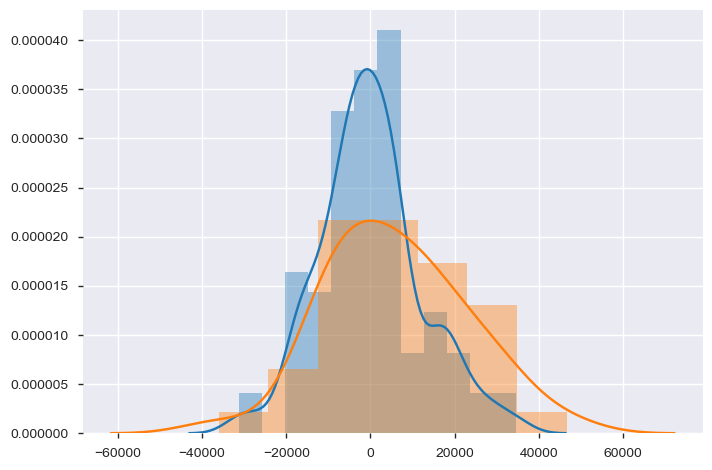

In [260]:
# Check
#1. Errors have normal distribution
#2. Errors do not have relationship with Y--- Ideally between 10% ; Linenet can be 20%; If more than that them improv emodel

train_errors=train_actual-train_predicted
test_errors=test_actual-test_predicted
sns.distplot(train_errors)
sns.distplot(test_errors)

In [261]:
Y_error_corrcoef=np.corrcoef(train_actual, train_errors)
print(Y_error_corrcoef)

[[1.         0.43833169]
 [0.43833169 1.        ]]


In [265]:
#Decile analysis

train_results= pd.concat([train_actual,train_predicted],axis=1)
test_results= pd.concat([test_actual,test_predicted],axis=1)
train_results.columns=['actual','predicted']
test_results.columns=['actual','predicted']

train_results['Deciles']=pd.qcut(train_results['predicted'],10,labels=False,duplicates="drop")
x1=train_results.groupby(['Deciles']).apply(mean)
#train_results.groupby(['Deciles']).agg([np.sum, np.mean,np.count])
test_results['Deciles']=pd.qcut(test_results['predicted'],10,labels=False,duplicates="drop")
x2=test_results.groupby(['Deciles']).apply(mean)
print("*****************Train**************************")
print(train_results.groupby(['Deciles']).agg(['sum','mean','count']))
print("*****************Test***************************")
print(test_results.groupby(['Deciles']).agg(['sum','mean','count']))

*****************Train**************************
          actual                          predicted                     
             sum           mean count           sum           mean count
Deciles                                                                 
0        1570200   98137.500000    16  1.570331e+06   98145.694628    16
1        1536000  109714.285714    14  1.534932e+06  109638.017956    14
2        1049100  116566.666667     9  1.032741e+06  114749.031674     9
3        1451400  120950.000000    12  1.472946e+06  122745.517908    12
4         931600  133085.714286     7  8.922317e+05  127461.668630     7
5         922600  131800.000000     7  9.482015e+05  135457.361255     7
6         871000  145166.666667     6  8.929608e+05  148826.802575     6
7        1930000  160833.333333    12  1.941456e+06  161788.032722    12
8        1102600  183766.666667     6  1.078699e+06  179783.119548     6
*****************Test***************************
         actual           